In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [4]:
a = ASODataset(single_graph_batch)
train_data, test_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_data, val_data = train_test_split(train_data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\Haoyu Fan\Desktop\GNN\GNN_enantioselectivity\runs\..\ASOhelpers.py:133: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


In [5]:
device = torch.device('cuda')
model = GNNModel_sg(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, num_layers=2, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.5097, Test Loss: 0.5346, Train MAE: 0.1287, Test MAE: 0.1368, , Train R2: 0.0145, Test R2: 0.0098
Epoch: 002, Train Loss: 0.5104, Test Loss: 0.5337, Train MAE: 0.1309, Test MAE: 0.1377, , Train R2: 0.0044, Test R2: 0.0231
Epoch: 003, Train Loss: 0.5093, Test Loss: 0.5332, Train MAE: 0.1291, Test MAE: 0.1364, , Train R2: 0.0210, Test R2: 0.0293
Epoch: 004, Train Loss: 0.5082, Test Loss: 0.5340, Train MAE: 0.1255, Test MAE: 0.1344, , Train R2: 0.0350, Test R2: 0.0159
Epoch: 005, Train Loss: 0.5093, Test Loss: 0.5318, Train MAE: 0.1300, Test MAE: 0.1361, , Train R2: 0.0218, Test R2: 0.0491
Epoch: 006, Train Loss: 0.5080, Test Loss: 0.5307, Train MAE: 0.1284, Test MAE: 0.1346, , Train R2: 0.0413, Test R2: 0.0642
Epoch: 007, Train Loss: 0.5053, Test Loss: 0.5307, Train MAE: 0.1226, Test MAE: 0.1313, , Train R2: 0.0749, Test R2: 0.0588
Epoch: 008, Train Loss: 0.5035, Test Loss: 0.5280, Train MAE: 0.1214, Test MAE: 0.1296, , Train R2: 0.1029, Test R2: 0.0954
Epoch: 0

array([0.45928243, 0.05587809, 0.7269256 , 0.48721886, 0.07272355,
       0.63447049])

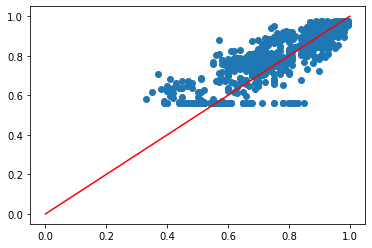

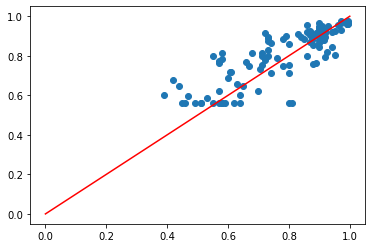

In [6]:
t = Trainer(model, device, optimizer, scheduler, glob_v= False)
t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)

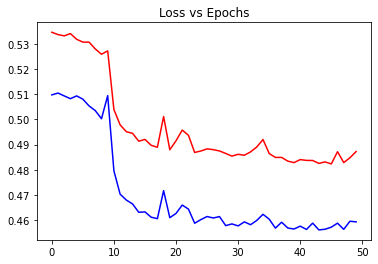

In [7]:
t.plot_log()